In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
ts_ds = xr.open_dataset('/Volumes/LtgSSD/tobac_saves/tobac_Save_20220602/timeseries_data_melt4500.nc')

In [4]:
ts_ds.sel(feature=15640).load()

<xarray.Dataset> Size: 9kB
Dimensions:                          (track: 502, cell: 647)
Coordinates:
  * track                            (track) float64 4kB 2.0 3.0 ... 768.0 769.0
  * cell                             (cell) int64 5kB 6 223 8 ... 5110 5087 5092
    feature                          int64 8B 15640
Data variables: (12/20)
    feature_area                     float64 8B 281.0
    feature_maxrefl                  float64 8B 36.0
    feature_zdrvol                   float64 8B 0.0
    feature_kdpvol                   float64 8B 0.0
    feature_rhvdeficitvol            float64 8B 0.0
    feature_zdrcol                   float32 4B 0.0
    ...                               ...
    feature_zdrwt_total              float64 8B 0.0
    feature_kdpwt_total              float64 8B 0.0
    feature_rhvdeficitwt_total       float64 8B 0.0
    feature_flash_count              float64 8B 0.0
    feature_flash_count_area_LE_4km  float64 8B 0.0
    feature_flash_count_area_GT_4km  float64 8B 0.0

In [5]:
ts_ds.sel(feature=15943).load()

<xarray.Dataset> Size: 9kB
Dimensions:                          (track: 502, cell: 647)
Coordinates:
  * track                            (track) float64 4kB 2.0 3.0 ... 768.0 769.0
  * cell                             (cell) int64 5kB 6 223 8 ... 5110 5087 5092
    feature                          int64 8B 15943
Data variables: (12/20)
    feature_area                     float64 8B 448.0
    feature_maxrefl                  float64 8B 52.48
    feature_zdrvol                   float64 8B 24.88
    feature_kdpvol                   float64 8B 4.125
    feature_rhvdeficitvol            float64 8B 38.12
    feature_zdrcol                   float32 4B 11.81
    ...                               ...
    feature_zdrwt_total              float64 8B 1.387e+05
    feature_kdpwt_total              float64 8B 5.359e+04
    feature_rhvdeficitwt_total       float64 8B 1.504e+04
    feature_flash_count              float64 8B 0.0
    feature_flash_count_area_LE_4km  float64 8B 0.0
    feature_flash_count_area_GT_4km  float64 8B 0.0

In [5]:
tfm_ds = xr.open_dataset('/Volumes/LtgSSD/tobac_saves/tobac_Save_20220602/Track_features_merges.nc')

/var/folders/sp/1j_lh9313dg42jrzhsfb4mk40000gn/T/ipykernel_78189/2392010853.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  tfm_ds = xr.open_dataset('/Volumes/LtgSSD/tobac_saves/tobac_Save_20220602/Track_features_merges.nc')


In [6]:
tfm_feat = tfm_ds.sel(feature=15640)
tfm_feat_cell = tfm_feat.sel(cell=tfm_feat.feature_parent_cell_id.data.item())
tfm_fc_track = tfm_feat_cell.sel(track=tfm_feat_cell.cell_parent_track_id.data.item())
tfm_fct_time = tfm_fc_track.isel(time=tfm_fc_track.feature_time_index.data.item())
tfm_fct_time.load()
tfm_fct_time

<xarray.Dataset> Size: 4MB
Dimensions:                           (y: 1001, x: 1001)
Coordinates:
    feature                           int64 8B 15640
    time                              datetime64[ns] 8B 2022-06-02T22:44:58.2...
  * y                                 (y) float64 8kB -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 8kB -2.5e+05 ... 2.5e+05
    track                             float64 8B 748.0
    cell                              int64 8B 4979
Data variables: (12/19)
    feature_time_index                int64 8B 266
    feature_id_this_frame             int64 8B 6
    feature_hdim1_coordinate          float64 8B 476.0
    feature_hdim2_coordinate          float64 8B 508.0
    feature_grid_cell_count           int64 8B 3
    feature_threshold_max             float64 8B 15.0
    ...                                ...
    feature_parent_cell_elapsed_time  timedelta64[ns] 8B 00:00:00
    segmentation_mask                 (y, x) int32 4MB 0 0 0 ... 15668 15668
    cell_parent_track_id              float64 8B 748.0
    feature_parent_track_id           float64 8B 748.0
    track_child_cell_count            float64 8B 1.0
    cell_child_feature_count          float64 8B 5.0

In [7]:
sbf_obs = xr.open_dataset('/Volumes/LtgSSD/tobac_saves/tobac_Save_20220602/seabreeze-obs.zarr')

/Users/stgardner4/micromamba/envs/tracer/lib/python3.12/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/var/folders/sp/1j_lh9313dg42jrzhsfb4mk40000gn/T/ipykernel_77563/1702790539.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  sbf_obs = xr.open_dataset('/Volumes/LtgSSD/tobac_saves/tobac_Save_20220602/seabreeze-obs.zarr')


In [8]:
sbf_obs_selected = sbf_obs.sel(feature=15640)
sbf_obs_selected = sbf_obs_selected.sel(cell=sbf_obs_selected.feature_parent_cell_id.data.item(), track=sbf_obs_selected.feature_parent_track_id.data.item())
sbf_obs_selected = sbf_obs_selected.isel(time=sbf_obs_selected.feature_time_index.data.item())
sbf_obs_selected.load()
sbf_obs_selected.feature_zdrvol

<xarray.DataArray 'feature_zdrvol' ()> Size: 8B
array(59.875)
Coordinates:
    track    float64 8B 748.0
    time     datetime64[ns] 8B 2022-06-02T22:44:58.226999936
    cell     int64 8B 4979
    feature  int64 8B 15640

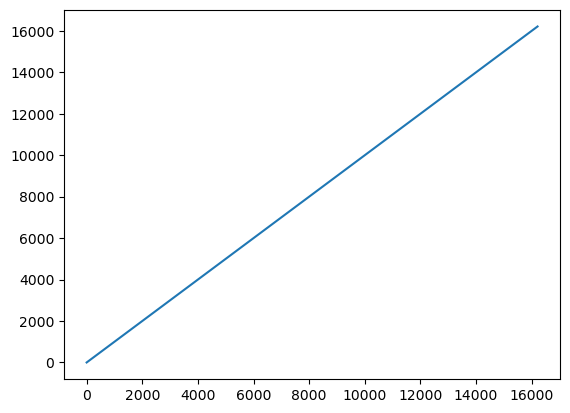

In [9]:
plt.plot(np.arange(0, len(sbf_obs.feature)), sbf_obs.feature)